In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import pyodbc
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
#pd.set_option('display.max_rows',None)


In [3]:
load_dotenv()
#Obtener credenciales
db_server=os.getenv("DB_SERVER")
db_name=os.getenv("DB_NAME")
db_schema=os.getenv("DB_SCHEMA")
db_tabla_entrenamiento=os.getenv("DB_TABLA_ENTRENAMIENTO")
db_tabla_destino=os.getenv("DB_TABLA_DESTINO")
db_tabla_cl=os.getenv("DB_TABLA_CL")
db_tabla_predict=os.getenv("DB_TABLA_PREDICT")


In [10]:

try:  
    connection = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={db_server};DATABASE={db_name};trusted_connection=yes')

    consulta_sql = f"""  select * from {db_name}.{db_schema}.{db_tabla_entrenamiento}  """
    df_sql_resultados = pd.read_sql(consulta_sql, connection)
        
except pyodbc.Error as e:
    print("OCURRIO UN ERROR:", e)
except Exception as e1:
    print("ERROR INESPERRADO:", e1)
finally:
    connection.close()


C:\Users\xvillanuevam\AppData\Local\Temp\ipykernel_37644\856673833.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql_resultados = pd.read_sql(consulta_sql, connection)


In [4]:
#Guardado de informacion
df_sql_resultados.to_pickle('C:/Users/xvillanuevam/Desktop/TRASPASO PRACTICANTE/QUERYS VARIOS/ML/dataset.pkl')

NameError: name 'df_sql_resultados' is not defined

In [5]:
#Carga de informacion
df_sql_resultados=pd.read_pickle('C:/Users/xvillanuevam/Desktop/TRASPASO PRACTICANTE/QUERYS VARIOS/ML/dataset.pkl')

In [6]:
df_sql_resultados.head()

,OPENRATE,LINEACREDITO,EDAD,DEPARTAMENTO_RENIEC,SITUACIONLABORAL,NSE,meses_entre_consumos,meses_entre_consumos_categorizado,consumio_h1m_SUPERMERCADO,monto_consum_h1m_SUPERMERCADO,...,consumio_um_COMIDA,monto_consumio_um_COMIDA,consumio_um_SALUD,monto_consumio_um_SALUD,consumio_um_TURISMO,monto_consumio_um_TURISMO,DiasMora,NombreSituacionCliente,NombreTipoTarjeta,LLAVE
0,0.00,600.0,32.0,CALLAO,Dependiente,C,0.50,[0-1],1,49.79,...,1,46.4,0,0.0,0,0.0,0,NORMAL,VISA CLASICA,f21ae1c6cb59a0c6dc57ceb7346a144a909c5249569ebb...
1,46.73,1000.0,32.0,LIMA,Independiente,C,0.40,[0-1],1,1723.33,...,0,0.0,0,0.0,0,0.0,0,NORMAL,VISA CLASICA,f03aa054dc5ac23f6b24d2a39b891674583bbf07a6225b...
2,0.00,900.0,40.0,LIMA,Dependiente,C,5.50,<5-7],0,0.00,...,0,0.0,0,0.0,0,0.0,0,NORMAL,VISA CLASICA,c732c74b94d39c977cc78388e4135343a6e779393c4dd4...
3,1.46,31400.0,61.0,CALLAO,Dependiente,C,0.40,[0-1],0,0.00,...,0,0.0,0,0.0,0,0.0,0,NORMAL,VISA PLATINUM,69987976ccb482bf84da31c9acc4bb03ac73a6c82fe304...
4,92.49,5000.0,50.0,CALLAO,Dependiente,C,1.29,<1-3],0,0.00,...,0,0.0,0,0.0,0,0.0,0,NORMAL,VISA CLASICA,e93c64cf4d4a48acb2cfae4eb85060f423159e3e8e573d...


In [7]:
df_sql_resultados=df_sql_resultados[['LLAVE','LINEACREDITO','EDAD','DEPARTAMENTO_RENIEC','SITUACIONLABORAL','NSE','DiasMora','NombreTipoTarjeta','NombreSituacionCliente','meses_entre_consumos','consumio_h1m_SALUD','monto_consum_h1m_SALUD','trx_consum_h1m_SALUD','consumio_h2m_h3m_SALUD','monto_consum_h2m_h3m_SALUD','trx_consum_h2m_h3m_SALUD','consumio_h4m_h5m_SALUD','monto_consum_h4m_h5m_SALUD','trx_consum_h4m_h5m_SALUD','ult_mes_consum_SALUD','meses_entre_consum_SALUD','PERIODO_PREDECIR','Periodo_en_temporada_consumo','consumio_um_SALUD','monto_consumio_um_SALUD']]


In [8]:
df_sql_resultados.head()

,LLAVE,LINEACREDITO,EDAD,DEPARTAMENTO_RENIEC,SITUACIONLABORAL,NSE,DiasMora,NombreTipoTarjeta,NombreSituacionCliente,meses_entre_consumos,...,trx_consum_h2m_h3m_SALUD,consumio_h4m_h5m_SALUD,monto_consum_h4m_h5m_SALUD,trx_consum_h4m_h5m_SALUD,ult_mes_consum_SALUD,meses_entre_consum_SALUD,PERIODO_PREDECIR,Periodo_en_temporada_consumo,consumio_um_SALUD,monto_consumio_um_SALUD
0,f21ae1c6cb59a0c6dc57ceb7346a144a909c5249569ebb...,600.0,32.0,CALLAO,Dependiente,C,0,VISA CLASICA,NORMAL,0.50,...,2,1,224.8,2,0.0,3.0,202406,1,0,0.0
1,f03aa054dc5ac23f6b24d2a39b891674583bbf07a6225b...,1000.0,32.0,LIMA,Independiente,C,0,VISA CLASICA,NORMAL,0.40,...,1,1,45.9,1,2.0,NaN,202406,1,0,0.0
2,c732c74b94d39c977cc78388e4135343a6e779393c4dd4...,900.0,40.0,LIMA,Dependiente,C,0,VISA CLASICA,NORMAL,5.50,...,0,0,0.0,0,NaN,NaN,202406,1,0,0.0
3,69987976ccb482bf84da31c9acc4bb03ac73a6c82fe304...,31400.0,61.0,CALLAO,Dependiente,C,0,VISA PLATINUM,NORMAL,0.40,...,0,0,0.0,0,6.0,6.0,202406,1,0,0.0
4,e93c64cf4d4a48acb2cfae4eb85060f423159e3e8e573d...,5000.0,50.0,CALLAO,Dependiente,C,0,VISA CLASICA,NORMAL,1.29,...,0,0,0.0,0,NaN,NaN,202406,1,0,0.0


In [9]:
#Porcentaje de nulos
pd.set_option('display.max_rows',None)
porcentaje_nulos=(df_sql_resultados.isnull().sum()/len(df_sql_resultados))*100
porcentaje_nulos


LLAVE                            0.000000
LINEACREDITO                     0.000000
EDAD                             7.305660
DEPARTAMENTO_RENIEC              0.186792
SITUACIONLABORAL                 0.186792
NSE                              0.186792
DiasMora                         0.000000
NombreTipoTarjeta                0.000000
NombreSituacionCliente           0.000000
meses_entre_consumos            16.429724
consumio_h1m_SALUD               0.000000
monto_consum_h1m_SALUD           0.000000
trx_consum_h1m_SALUD             0.000000
consumio_h2m_h3m_SALUD           0.000000
monto_consum_h2m_h3m_SALUD       0.000000
trx_consum_h2m_h3m_SALUD         0.000000
consumio_h4m_h5m_SALUD           0.000000
monto_consum_h4m_h5m_SALUD       0.000000
trx_consum_h4m_h5m_SALUD         0.000000
ult_mes_consum_SALUD            63.334175
meses_entre_consum_SALUD        75.629912
PERIODO_PREDECIR                 0.000000
Periodo_en_temporada_consumo     0.000000
consumio_um_SALUD                0

In [ ]:
#1. Reemplazo de valores nulos

In [ ]:
#df_sql_resultados.groupby('meses_entre_consum_SALUD').size().reset_index(name='cantidad')

In [10]:
#Columnas con menos del 20% de valores nulos
    #variables categóricas
df_sql_resultados['DEPARTAMENTO_RENIEC'].fillna(df_sql_resultados['DEPARTAMENTO_RENIEC'].mode()[0],inplace=True) 

df_sql_resultados['SITUACIONLABORAL'].fillna(df_sql_resultados['SITUACIONLABORAL'].mode()[0],inplace=True) 

df_sql_resultados['NSE'].fillna(df_sql_resultados['NSE'].mode()[0],inplace=True) 

    #variables numéricas
df_sql_resultados['EDAD'].fillna(df_sql_resultados['EDAD'].median(),inplace=True) 
df_sql_resultados['EDAD']=df_sql_resultados['EDAD'].astype(int)

df_sql_resultados['meses_entre_consumos'].fillna(df_sql_resultados['meses_entre_consumos'].median(),inplace=True) 
df_sql_resultados['meses_entre_consumos']=df_sql_resultados['meses_entre_consumos'].astype(int)

In [11]:
#Columnas con más del 60% de valores nulos

df_sql_resultados['ult_mes_consum_SALUD']=df_sql_resultados['ult_mes_consum_SALUD'].fillna(20.0).astype(float)
df_sql_resultados['meses_entre_consum_SALUD']=df_sql_resultados['meses_entre_consum_SALUD'].fillna(20.0).astype(float)

In [12]:
#Porcentaje de nulos FINAL
pd.set_option('display.max_rows',None)
porcentaje_nulos=(df_sql_resultados.isnull().sum()/len(df_sql_resultados))*100
porcentaje_nulos

LLAVE                           0.0
LINEACREDITO                    0.0
EDAD                            0.0
DEPARTAMENTO_RENIEC             0.0
SITUACIONLABORAL                0.0
NSE                             0.0
DiasMora                        0.0
NombreTipoTarjeta               0.0
NombreSituacionCliente          0.0
meses_entre_consumos            0.0
consumio_h1m_SALUD              0.0
monto_consum_h1m_SALUD          0.0
trx_consum_h1m_SALUD            0.0
consumio_h2m_h3m_SALUD          0.0
monto_consum_h2m_h3m_SALUD      0.0
trx_consum_h2m_h3m_SALUD        0.0
consumio_h4m_h5m_SALUD          0.0
monto_consum_h4m_h5m_SALUD      0.0
trx_consum_h4m_h5m_SALUD        0.0
ult_mes_consum_SALUD            0.0
meses_entre_consum_SALUD        0.0
PERIODO_PREDECIR                0.0
Periodo_en_temporada_consumo    0.0
consumio_um_SALUD               0.0
monto_consumio_um_SALUD         0.0
dtype: float64

In [ ]:
#2. Reemplazo de valores erróneos/desconocidos

In [13]:
#LineaCREDITO
conteo = df_sql_resultados[df_sql_resultados['LINEACREDITO']<300].shape[0]
conteo

25170

In [14]:
mediana=df_sql_resultados['LINEACREDITO'].median()
df_sql_resultados['LINEACREDITO']=np.where(df_sql_resultados['LINEACREDITO']<300,mediana,df_sql_resultados['LINEACREDITO'])

In [15]:
#DEPARTAMENTO_RENIEC
conteo = df_sql_resultados[df_sql_resultados['DEPARTAMENTO_RENIEC']==''].shape[0]
conteo

18452

In [16]:
moda=df_sql_resultados['DEPARTAMENTO_RENIEC'].mode()[0]
df_sql_resultados['DEPARTAMENTO_RENIEC']=np.where(df_sql_resultados['DEPARTAMENTO_RENIEC']=='',moda,df_sql_resultados['DEPARTAMENTO_RENIEC'])

In [17]:
#SITUACIONLABORAL

conteo = df_sql_resultados[df_sql_resultados['SITUACIONLABORAL']==''].shape[0]
conteo

186146

In [18]:
moda=df_sql_resultados['SITUACIONLABORAL'].mode()[0]
df_sql_resultados['SITUACIONLABORAL']=np.where(df_sql_resultados['SITUACIONLABORAL']=='',moda,df_sql_resultados['SITUACIONLABORAL'])

In [19]:
#SITUACIONLABORAL

conteo = df_sql_resultados[df_sql_resultados['NSE']==''].shape[0]
conteo

258758

In [20]:
moda=df_sql_resultados['NSE'].mode()[0]
df_sql_resultados['NSE']=np.where(df_sql_resultados['NSE']=='',moda,df_sql_resultados['NSE'])

In [ ]:
#3. Reemplazo de valores atípicos

In [21]:
 
# Función para calcular el porcentaje de valores atípicos
def porcentaje_atipicos(df):
    resultados = {}
    for columna in df.select_dtypes(include='number').columns:

        if (columna=="ult_mes_consum_SALUD" or columna=="meses_entre_consum_SALUD"):
            df_filtrado=df[columna][df[columna]!=20.0]
        else:
            df_filtrado=df[columna]
        
        # Calcular Q1, Q3 e IQR
        Q1 = df_filtrado.quantile(0.25)
        Q3 = df_filtrado.quantile(0.75)
        IQR = Q3 - Q1
        # Definir límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar valores atípicos
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje = len(outliers) / len(df) * 100
        # Guardar resultado
        resultados[columna] = porcentaje
    return resultados
 
# Calcular el porcentaje de valores atípicos
porcentajes = porcentaje_atipicos(df_sql_resultados)
 
# Mostrar resultados
print("Porcentaje de valores atípicos por columna:")
for columna, porcentaje in porcentajes.items():
    print(f"{columna}: {porcentaje:.3f}%")


Porcentaje de valores atípicos por columna:
LINEACREDITO: 5.350%
EDAD: 0.389%
DiasMora: 1.156%
meses_entre_consumos: 18.099%
consumio_h1m_SALUD: 10.827%
monto_consum_h1m_SALUD: 10.827%
trx_consum_h1m_SALUD: 10.827%
consumio_h2m_h3m_SALUD: 0.000%
monto_consum_h2m_h3m_SALUD: 21.971%
trx_consum_h2m_h3m_SALUD: 11.644%
consumio_h4m_h5m_SALUD: 0.000%
monto_consum_h4m_h5m_SALUD: 19.069%
trx_consum_h4m_h5m_SALUD: 14.659%
ult_mes_consum_SALUD: 63.334%
meses_entre_consum_SALUD: 77.586%
Periodo_en_temporada_consumo: 0.000%
consumio_um_SALUD: 10.749%
monto_consumio_um_SALUD: 10.749%


In [22]:
def evaluacion_datos_cuartiles(columna,nombrecolumna):

    if (nombrecolumna=="consumio_h1m_SALUD" or nombrecolumna=="consumio_h2m_h3m_SALUD" or nombrecolumna=="consumio_h4m_h5m_SALUD" or nombrecolumna=="Periodo_en_temporada_consumo"):
        return "ND"
    else:
        if (nombrecolumna=="ult_mes_consum_SALUD" or nombrecolumna=="meses_entre_consum_SALUD"):
            df_filtrado=columna[columna!=20.0]
        else:
            df_filtrado=columna
        
        # Calcular Q1, Q3 e IQR
        Q1 = df_filtrado.quantile(0.25)
        Q2 = df_filtrado.quantile(0.5)
        Q3 = df_filtrado.quantile(0.75)

        IQR = Q3 - Q1
        # Definir límites para valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        #return Q3
        return f"{nombrecolumna} -> IQR: {IQR}, mediana: {Q2},limite inf: {limite_inferior},limite sup: {limite_superior}"
 

In [23]:
def evaluacion_IQR_zero(columna,nombrecolumna):
    if (nombrecolumna=="consumio_h1m_SALUD" or nombrecolumna=="consumio_h2m_h3m_SALUD" or nombrecolumna=="consumio_h4m_h5m_SALUD" or nombrecolumna=="Periodo_en_temporada_consumo"):
        return "ND"
    else:
        if (nombrecolumna=="ult_mes_consum_SALUD" or nombrecolumna=="meses_entre_consum_SALUD"):
            df_filtrado=columna[columna!=20.0]
        else:
            df_filtrado=columna

    valor_maximo = max(df_filtrado)
    valor_minimo = min(df_filtrado)
    P1 = df_filtrado.quantile(0.01)
    P99 = df_filtrado.quantile(0.99)

    return f"{nombrecolumna} -> P1: {P1}, P99: {P99},valor minimo: {valor_minimo},valor maximo: {valor_maximo}"
    

In [24]:
print(evaluacion_datos_cuartiles(df_sql_resultados['LINEACREDITO'],'LINEACREDITO'))
print(evaluacion_datos_cuartiles(df_sql_resultados['EDAD'],'EDAD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['DiasMora'],'DiasMora'))
print(evaluacion_datos_cuartiles(df_sql_resultados['meses_entre_consumos'],'meses_entre_consumos'))
print(evaluacion_datos_cuartiles(df_sql_resultados['monto_consum_h1m_SALUD'],'monto_consum_h1m_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['trx_consum_h1m_SALUD'],'trx_consum_h1m_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['monto_consum_h2m_h3m_SALUD'],'monto_consum_h2m_h3m_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['trx_consum_h2m_h3m_SALUD'],'trx_consum_h2m_h3m_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['monto_consum_h4m_h5m_SALUD'],'monto_consum_h4m_h5m_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['trx_consum_h4m_h5m_SALUD'],'trx_consum_h4m_h5m_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['ult_mes_consum_SALUD'],'ult_mes_consum_SALUD'))
print(evaluacion_datos_cuartiles(df_sql_resultados['meses_entre_consum_SALUD'],'meses_entre_consum_SALUD'))

LINEACREDITO -> IQR: 6900.0, mediana: 3500.0,limite inf: -9250.0,limite sup: 18350.0
EDAD -> IQR: 18.0, mediana: 43.0,limite inf: 8.0,limite sup: 80.0
DiasMora -> IQR: 0.0, mediana: 0.0,limite inf: 0.0,limite sup: 0.0
meses_entre_consumos -> IQR: 0.0, mediana: 0.0,limite inf: 0.0,limite sup: 0.0
monto_consum_h1m_SALUD -> IQR: 0.0, mediana: 0.0,limite inf: 0.0,limite sup: 0.0
trx_consum_h1m_SALUD -> IQR: 0.0, mediana: 0.0,limite inf: 0.0,limite sup: 0.0
monto_consum_h2m_h3m_SALUD -> IQR: 16.7, mediana: 0.0,limite inf: -25.049999999999997,limite sup: 41.75
trx_consum_h2m_h3m_SALUD -> IQR: 1.0, mediana: 0.0,limite inf: -1.5,limite sup: 2.5
monto_consum_h4m_h5m_SALUD -> IQR: 47.5, mediana: 0.0,limite inf: -71.25,limite sup: 118.75
trx_consum_h4m_h5m_SALUD -> IQR: 1.0, mediana: 0.0,limite inf: -1.5,limite sup: 2.5
ult_mes_consum_SALUD -> IQR: 5.0, mediana: 2.0,limite inf: -7.5,limite sup: 12.5
meses_entre_consum_SALUD -> IQR: 1.67, mediana: 2.0,limite inf: -1.1749999999999998,limite sup: 5.

In [25]:
#********** PARA LOS IQR=0   ***********+

#DiasMora
print(evaluacion_IQR_zero(df_sql_resultados['DiasMora'],'DiasMora'))
#meses_entre_consumos
print(evaluacion_IQR_zero(df_sql_resultados['meses_entre_consumos'],'meses_entre_consumos'))
#monto_consum_h1m_SALUD 
print(evaluacion_IQR_zero(df_sql_resultados['monto_consum_h1m_SALUD'],'monto_consum_h1m_SALUD'))
#trx_consum_h1m_SALUD 
print(evaluacion_IQR_zero(df_sql_resultados['trx_consum_h1m_SALUD'],'trx_consum_h1m_SALUD'))

DiasMora -> P1: 0.0, P99: 10.0,valor minimo: 0,valor maximo: 4263
meses_entre_consumos -> P1: 0.0, P99: 4.0,valor minimo: 0,valor maximo: 12
monto_consum_h1m_SALUD -> P1: 0.0, P99: 459.8715000000014,valor minimo: 0.0,valor maximo: 30300.0
trx_consum_h1m_SALUD -> P1: 0.0, P99: 4.0,valor minimo: 0,valor maximo: 107


In [26]:
def reemplazar_atipicos(columna,nombrecolumna):
    
    #Eliminar el valor 20 de la evaluacion si son las variables ult_mes_consum_SALUD y meses_entre_consum_SALUD
    if (nombrecolumna=="ult_mes_consum_SALUD" or nombrecolumna=="meses_entre_consum_SALUD"):
        columna_limpiada=columna[columna!=20.0]
    else:
        columna_limpiada=columna
    # Calcular Q1, Q3 e IQR
    Q1 = columna_limpiada.quantile(0.25)
    Q3 = columna_limpiada.quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    if IQR==0:
        limite_inferior = columna_limpiada.quantile(0.01)
        limite_superior = columna_limpiada.quantile(0.99)
    
    #reemplazar valores atipicos segun regla
    if (nombrecolumna=="ult_mes_consum_SALUD" or nombrecolumna=="meses_entre_consum_SALUD"):
        #columna=np.where((columna<limite_inferior) and (columna!=20),limite_inferior,columna)
        #columna=np.where((columna>limite_superior) and (columna!=20),limite_superior,columna)
        #columna.loc[(columna<limite_inferior) & (columna!=20.0),columna]=limite_inferior
        #columna.loc[(columna>limite_superior) & (columna!=20.0),columna]=limite_superior
        df_result=columna.apply(lambda x: limite_inferior if (x<limite_inferior and x!=20) else limite_superior if (x>limite_superior and x!=20) else x)
    else:
        df_result=columna.apply(lambda x: limite_inferior if (x<limite_inferior) else limite_superior if (x>limite_superior) else x)
    return df_result

In [27]:
#LIMPIEZA DE ATIPICOS

df_sql_resultados['LINEACREDITO']=reemplazar_atipicos(df_sql_resultados['LINEACREDITO'],'LINEACREDITO')
df_sql_resultados['EDAD']=reemplazar_atipicos(df_sql_resultados['EDAD'],'EDAD')
df_sql_resultados['DiasMora']=reemplazar_atipicos(df_sql_resultados['DiasMora'],'DiasMora')
df_sql_resultados['meses_entre_consumos']=reemplazar_atipicos(df_sql_resultados['meses_entre_consumos'],'meses_entre_consumos')
df_sql_resultados['monto_consum_h1m_SALUD']=reemplazar_atipicos(df_sql_resultados['monto_consum_h1m_SALUD'],'monto_consum_h1m_SALUD')
df_sql_resultados['trx_consum_h1m_SALUD']=reemplazar_atipicos(df_sql_resultados['trx_consum_h1m_SALUD'],'trx_consum_h1m_SALUD')
df_sql_resultados['monto_consum_h2m_h3m_SALUD']=reemplazar_atipicos(df_sql_resultados['monto_consum_h2m_h3m_SALUD'],'monto_consum_h2m_h3m_SALUD')
df_sql_resultados['trx_consum_h2m_h3m_SALUD']=reemplazar_atipicos(df_sql_resultados['trx_consum_h2m_h3m_SALUD'],'trx_consum_h2m_h3m_SALUD')
df_sql_resultados['monto_consum_h4m_h5m_SALUD']=reemplazar_atipicos(df_sql_resultados['monto_consum_h4m_h5m_SALUD'],'monto_consum_h4m_h5m_SALUD')
df_sql_resultados['trx_consum_h4m_h5m_SALUD']=reemplazar_atipicos(df_sql_resultados['trx_consum_h4m_h5m_SALUD'],'trx_consum_h4m_h5m_SALUD')
df_sql_resultados['ult_mes_consum_SALUD']=reemplazar_atipicos(df_sql_resultados['ult_mes_consum_SALUD'],'ult_mes_consum_SALUD')
df_sql_resultados['meses_entre_consum_SALUD']=reemplazar_atipicos(df_sql_resultados['meses_entre_consum_SALUD'],'meses_entre_consum_SALUD')


In [28]:
# Calcular el porcentaje de valores atípicos
porcentajes = porcentaje_atipicos(df_sql_resultados)
 
# Mostrar resultados
print("Porcentaje de valores atípicos por columna:")
for columna, porcentaje in porcentajes.items():
    print(f"{columna}: {porcentaje:.3f}%")

Porcentaje de valores atípicos por columna:
LINEACREDITO: 0.000%
EDAD: 0.000%
DiasMora: 1.156%
meses_entre_consumos: 18.099%
consumio_h1m_SALUD: 10.827%
monto_consum_h1m_SALUD: 10.827%
trx_consum_h1m_SALUD: 10.827%
consumio_h2m_h3m_SALUD: 0.000%
monto_consum_h2m_h3m_SALUD: 0.000%
trx_consum_h2m_h3m_SALUD: 0.000%
consumio_h4m_h5m_SALUD: 0.000%
monto_consum_h4m_h5m_SALUD: 0.000%
trx_consum_h4m_h5m_SALUD: 0.000%
ult_mes_consum_SALUD: 63.334%
meses_entre_consum_SALUD: 75.630%
Periodo_en_temporada_consumo: 0.000%
consumio_um_SALUD: 10.749%
monto_consumio_um_SALUD: 10.749%


In [ ]:
#Nueva visualización de datos

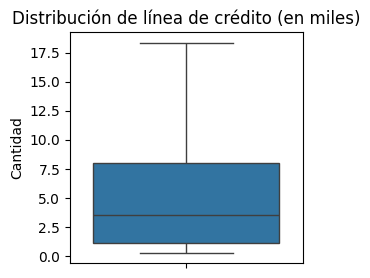

In [29]:
#LINEACREDITO

plt.figure(figsize=(3,3))
sns.boxplot(y=df_sql_resultados['LINEACREDITO']/1000)
plt.title('Distribución de línea de crédito (en miles)')
plt.ylabel('Cantidad')
plt.show()

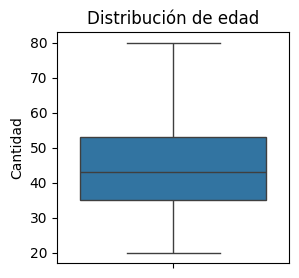

In [30]:
#EDAD

plt.figure(figsize=(3,3))
sns.boxplot(y=df_sql_resultados['EDAD'])
plt.title('Distribución de edad')
plt.ylabel('Cantidad')
plt.show()

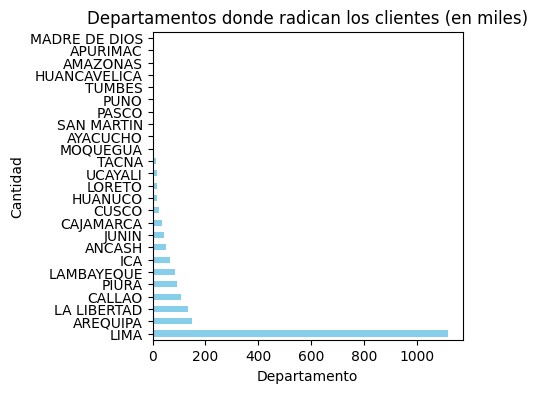

In [31]:
#DEPARTAMENTO_RENIEC
conteo=df_sql_resultados['DEPARTAMENTO_RENIEC'].value_counts()/1000

plt.figure(figsize=(4,4))
conteo.plot(kind='barh',color='skyblue')
plt.title('Departamentos donde radican los clientes (en miles)')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

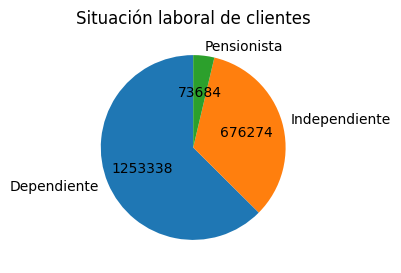

In [32]:
#SITUACIONLABORAL

conteo=df_sql_resultados['SITUACIONLABORAL'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Situación laboral de clientes')
plt.ylabel('')
plt.show()

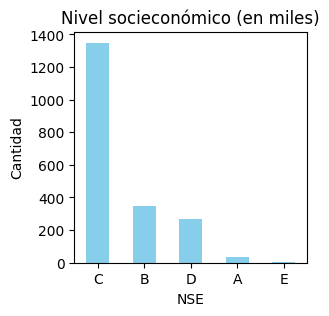

In [33]:
#NSE

conteo=df_sql_resultados['NSE'].value_counts()/1000

plt.figure(figsize=(3,3))
conteo.plot(kind='bar',color='skyblue')
plt.title('Nivel socieconómico (en miles)')
plt.xlabel('NSE')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

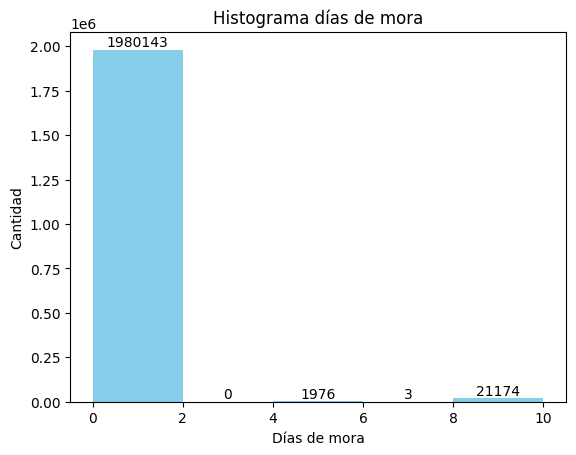

In [38]:
n,bins,patches=plt.hist(df_sql_resultados['DiasMora'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma días de mora')
plt.ylabel('Cantidad')
plt.xlabel('Días de mora')
plt.show()

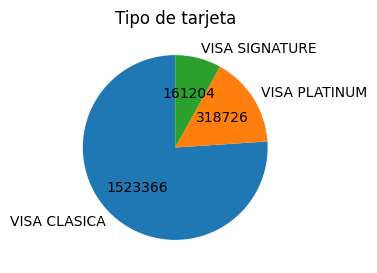

In [37]:
#NombreTipoTarjeta

conteo=df_sql_resultados['NombreTipoTarjeta'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Tipo de tarjeta')
plt.ylabel('')
plt.show()

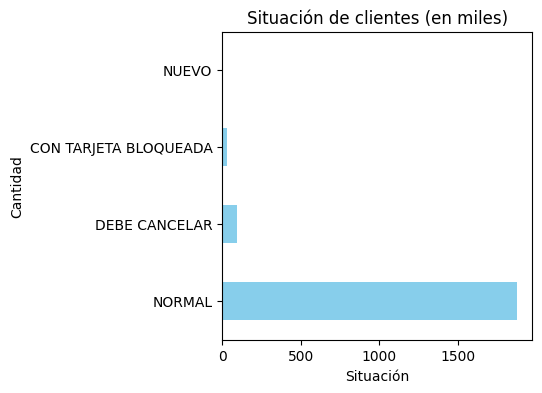

In [39]:
#NombreSituacionCliente

   #modificamos etiquetas para abreviar

df_sql_resultados['NombreSituacionCliente']=df_sql_resultados['NombreSituacionCliente'].replace('Clientes con TC Entregada en SAT habilitados para compras y han hecho su 1era compra','NUEVO')
df_sql_resultados['NombreSituacionCliente']=df_sql_resultados['NombreSituacionCliente'].replace('Clientes habilitados para usar TC pero no han hecho su 1er consumo','NUEVO')
df_sql_resultados['NombreSituacionCliente']=df_sql_resultados['NombreSituacionCliente'].replace('Cuenta con tarjeta bloqueada','CON TARJETA BLOQUEADA')

conteo=df_sql_resultados['NombreSituacionCliente'].value_counts()/1000

plt.figure(figsize=(4,4))
conteo.plot(kind='barh',color='skyblue')
plt.title('Situación de clientes (en miles)')
plt.xlabel('Situación')
plt.ylabel('Cantidad')
plt.show()

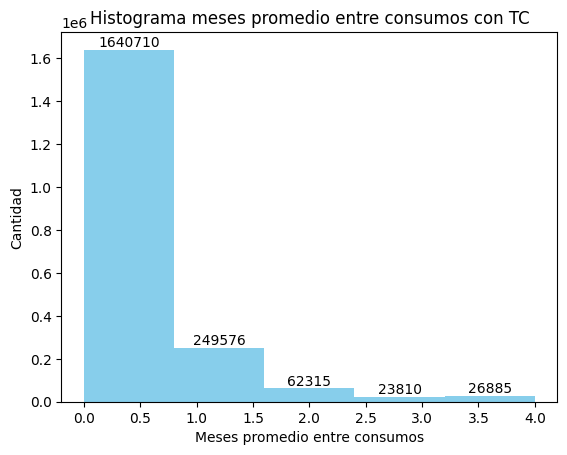

In [40]:
#meses_entre_consumos

n,bins,patches=plt.hist(df_sql_resultados['meses_entre_consumos'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma meses promedio entre consumos con TC')
plt.ylabel('Cantidad')
plt.xlabel('Meses promedio entre consumos')
plt.show()

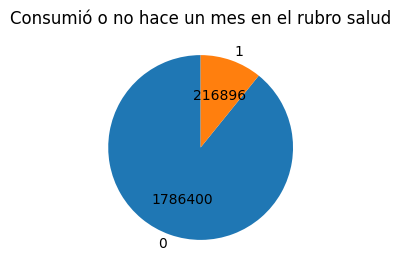

In [41]:
#consumio_h1m_SALUD

conteo=df_sql_resultados['consumio_h1m_SALUD'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Consumió o no hace un mes en el rubro salud')
plt.ylabel('')
plt.show()

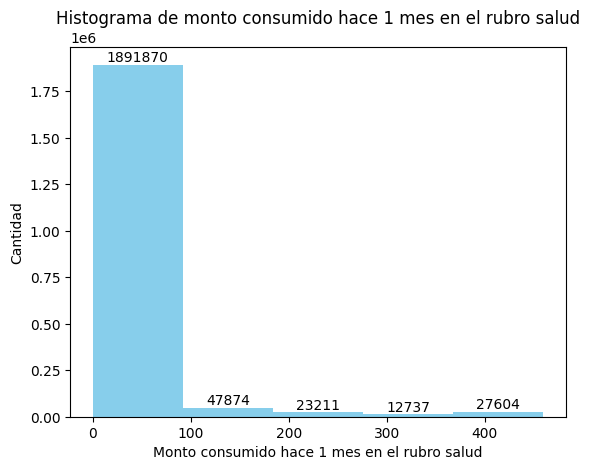

In [42]:
#monto_consum_h1m_SALUD

n,bins,patches=plt.hist(df_sql_resultados['monto_consum_h1m_SALUD'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de monto consumido hace 1 mes en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Monto consumido hace 1 mes en el rubro salud')
plt.show()

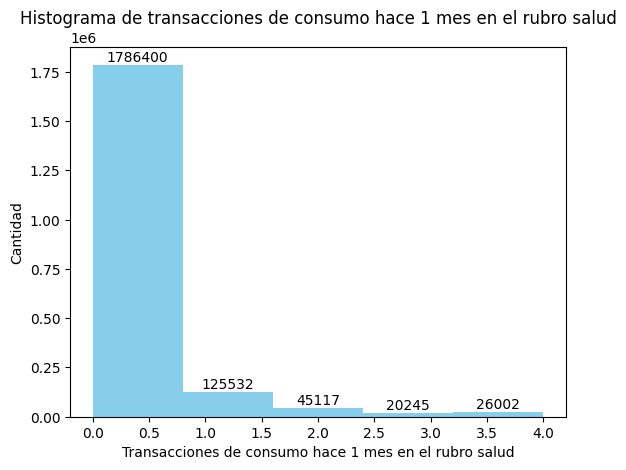

In [43]:
#trx_consum_h1m_SALUD

n,bins,patches=plt.hist(df_sql_resultados['trx_consum_h1m_SALUD'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de transacciones de consumo hace 1 mes en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Transacciones de consumo hace 1 mes en el rubro salud')
plt.show()

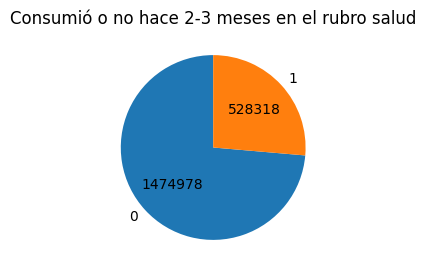

In [44]:
#consumio_h2m_h3m_SALUD

conteo=df_sql_resultados['consumio_h2m_h3m_SALUD'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Consumió o no hace 2-3 meses en el rubro salud')
plt.ylabel('')
plt.show()

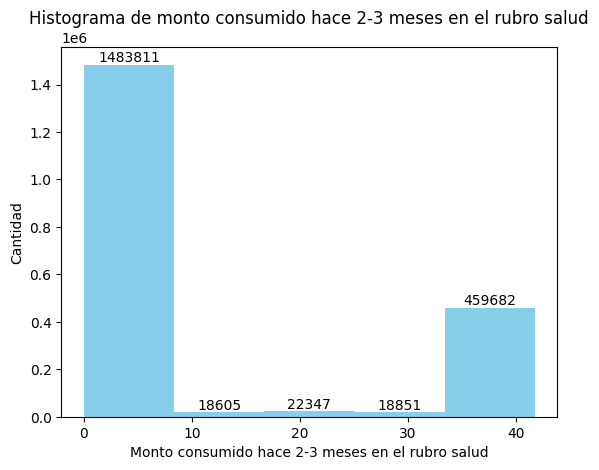

In [45]:
#monto_consum_h2m_h3m_SALUD

n,bins,patches=plt.hist(df_sql_resultados['monto_consum_h2m_h3m_SALUD'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de monto consumido hace 2-3 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Monto consumido hace 2-3 meses en el rubro salud')
plt.show()

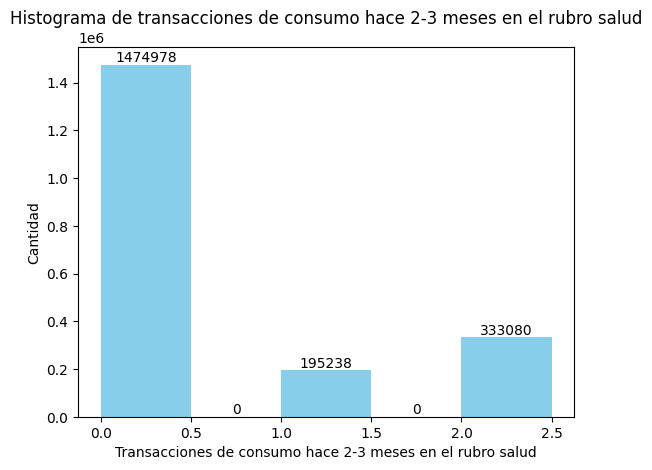

In [46]:
#trx_consum_h2m_h3m_SALUD

n,bins,patches=plt.hist(df_sql_resultados['trx_consum_h2m_h3m_SALUD'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de transacciones de consumo hace 2-3 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Transacciones de consumo hace 2-3 meses en el rubro salud')
plt.show()

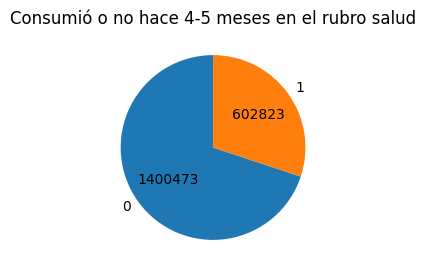

In [47]:
#consumio_h4m_h5m_SALUD

conteo=df_sql_resultados['consumio_h4m_h5m_SALUD'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Consumió o no hace 4-5 meses en el rubro salud')
plt.ylabel('')
plt.show()

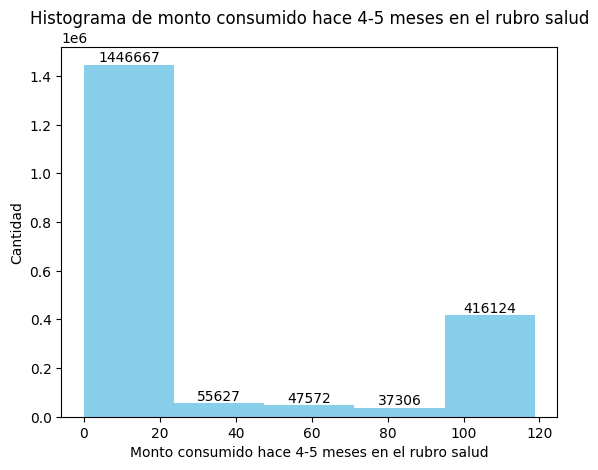

In [48]:
#monto_consum_h4m_h5m_SALUD

n,bins,patches=plt.hist(df_sql_resultados['monto_consum_h4m_h5m_SALUD'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de monto consumido hace 4-5 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Monto consumido hace 4-5 meses en el rubro salud')
plt.show()

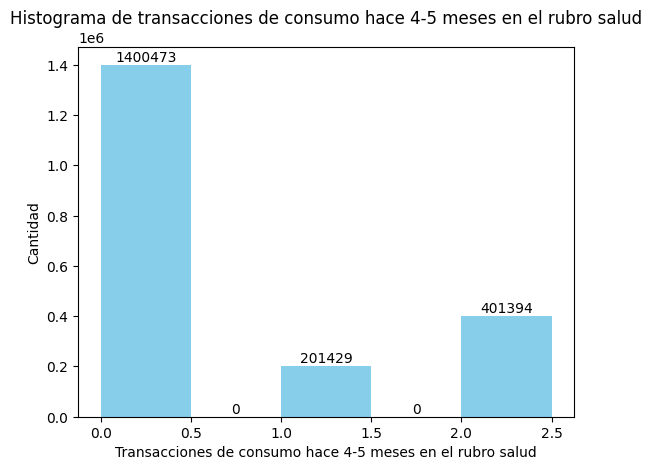

In [49]:
#trx_consum_h4m_h5m_SALUD

n,bins,patches=plt.hist(df_sql_resultados['trx_consum_h4m_h5m_SALUD'],bins=5,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.5,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de transacciones de consumo hace 4-5 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Transacciones de consumo hace 4-5 meses en el rubro salud')
plt.show()

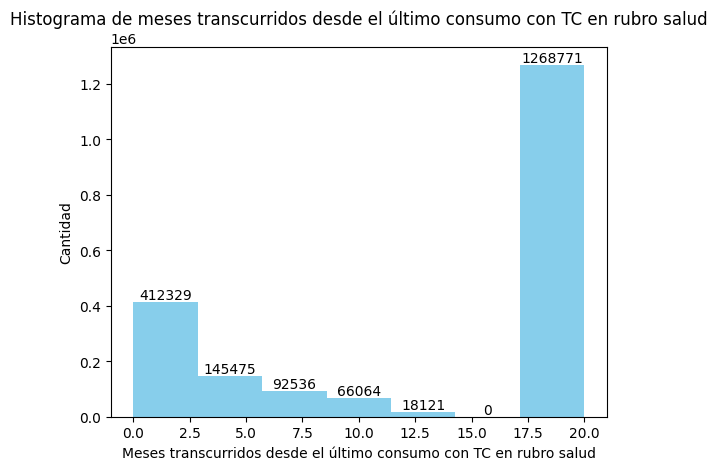

In [50]:
#ult_mes_consum_SALUD

n,bins,patches=plt.hist(df_sql_resultados['ult_mes_consum_SALUD'],bins=7,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.7,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de meses transcurridos desde el último consumo con TC en rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Meses transcurridos desde el último consumo con TC en rubro salud')
plt.show()

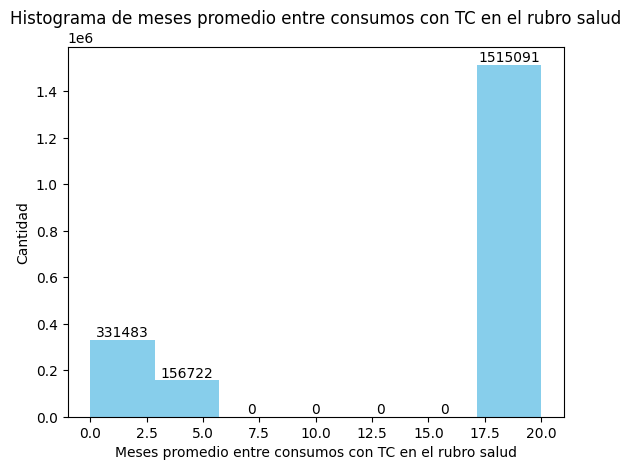

In [51]:
#meses_entre_consum_SALUD

n,bins,patches=plt.hist(df_sql_resultados['meses_entre_consum_SALUD'],bins=7,color='skyblue')

for i in range(len(patches)):
    plt.text((bins[i]+bins[i+1])/2,n[i]+0.7,str(int(n[i])),ha='center',va='bottom',fontsize=10)
    
plt.title('Histograma de meses promedio entre consumos con TC en el rubro salud')
plt.ylabel('Cantidad')
plt.xlabel('Meses promedio entre consumos con TC en el rubro salud')
plt.show()

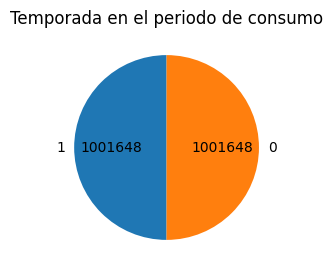

In [52]:
#PERIODO_PREDECIR

conteo=df_sql_resultados['Periodo_en_temporada_consumo'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Temporada en el periodo de consumo')
plt.ylabel('')
plt.show()

In [53]:
#Guardado de informacion
df_sql_resultados.to_pickle('C:/Users/xvillanuevam/Desktop/TRASPASO PRACTICANTE/QUERYS VARIOS/ML/dataset_datos_preparados.pkl')